<a href="https://colab.research.google.com/github/JS0501/ESAA_YB3/blob/main/ESAA_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념 정리]

[평균 이동]
*   K-평균과 유사하게 중심을 군집의 주심으로 지속적으로 움직이며 군집화 수행
*   K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
*   데이터의 분포도를 이용해 군집 중심점을 찾음
*   군집 중심점은 데이터 포인트가 모여있는 곳, 이를 위해 확률 밀도 함수(pdf) 이용
*   평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동
*   데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기에 좀 더 유연한 군집화 가능
*   이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요 없음
*   알고리즘 수행 시간이 오래 걸리고 bandwidth 크기에 따른 군집화 영향도가 매우 큼

[KDE]
*   커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정
*   대표적으로 가우시안 분포 함수
*   작은 h값(h=1.0)은 좁고 뾰족한 KDE, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움
*   큰 h값(h=10)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정, 과소적합하기 쉬움
*   일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐
*   사이킷런은 MeanShift 클래스 제공
*   bandwidth 파라미터가 KDE의 대역폭 h와 동일
*   최적 대역폭 계산을 위해 estimate_bandwidth() 함수 제공

[GMM]
*   GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행
*   서로 다른 정규 분포에 기반해 군집화 수행
*   K-평균이 거리 기반 군집화라면 GMM은 확률 기반 군집화
*   GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components
*   n_components는 gaussian mixture 모델의 총 개수

# [코드 필사]

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


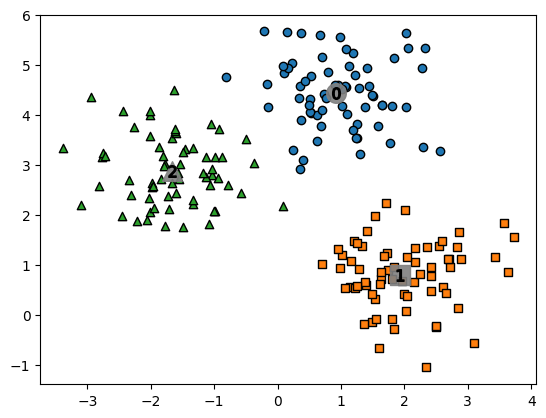

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


In [ ]:
# visualize_cluster_plot 함수 정의
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            isNoise=True

        # 군집별로 다른 마커로 산점도 적용
        if isNoise:
            marker='.'
            isNoise=False
        else:
            marker=markers[label % len(markers)]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=marker)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolor='k', marker=marker)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',
                        edgecolor='k', marker='$%d$' % label)

    if iscenter:
        plt.title(clusterobj.__class__.__name__ + ' Clusters')
    else:
        plt.title('Data Clusters')
    plt.show()

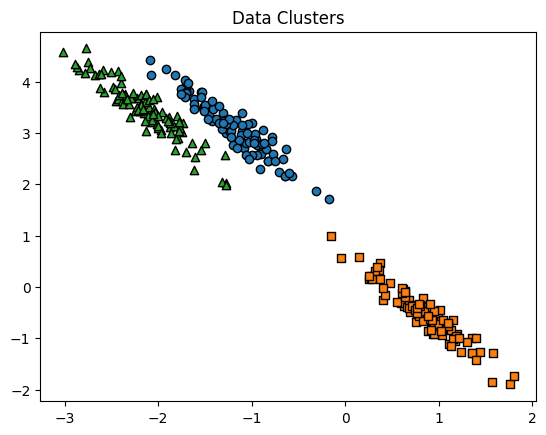

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation =  [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X,transformation)
# feature 데이터 세트와 make_blobs()의 y  결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

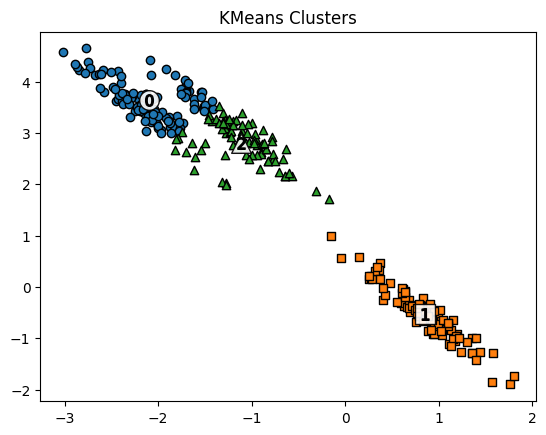

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3,random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

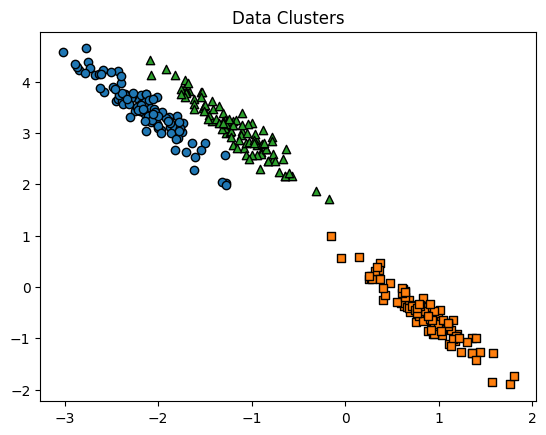

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF,'gmm_label',iscenter=False)

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
